### Gradient Descent ile Doğrusal Regresyon

###### Simple Linear Regression with Gradient Descentt from Scratch

* Ana amacımızı hatırlayalım. Hata ve cost fonksiyonumuz vardı. MSE değerimizi minimuma getirmeye çalışıyorduk.

* 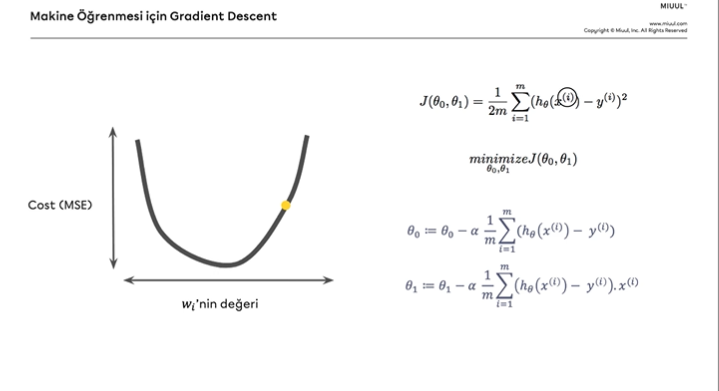


In [2]:
# Cost function MSE: Görevi MSE değerini hesaplamaktır.
def cost_function(Y, b, w, X):
    
    # Gözlem sayısı tutulur:
    m = len(Y)
    sse = 0
    
    # Tüm gözlem birimlerini geziyoruz:
    for i in range(0, m):
        
        # Tahmin edilen y değerleri hesaplanır:
        y_hat = b + w * X[i]
        
        # Gerçek y değerleri:
        y = Y[i]
        
        # sse hesaplanması
        sse += (y_hat - y) ** 2
        
    mse = sse / m
    return mse

In [3]:
# Update weights
def update_weights(Y, b, w, X, learning_rate):
    m = len(Y)
    
    # Gradyanları tutmak için tanımlanan iki değişken:
    b_deriv_sum = 0
    w_deriv_sum = 0
    
    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        
        # Tüm gözlem birimlerinden geçiriyoruz:
        b_deriv_sum += (y_hat - y)
        w_deriv_sum += (y_hat - y) * X[i]
        
    new_b = b - (learning_rate * 1 / m * b_deriv_sum)
    new_w = w - (learning_rate * 1 / m * w_deriv_sum)
    return new_b, new_w

In [4]:
# Train fonksiyonu

# Y: bağımlı değişken
# initial_b, initial_w: başta verilmiş olan ağırlık değerleri
# X: bağımsız değişken
# num_iters: iterasyon sayısı

def train(Y, initial_b, initial_w, X, learning_rate, num_iters):

    # Çalışmanın başında cost fonksiyonuna gerekli parametreleri girelim ve bunu raporlattıralım:
    # İlk hatanın raporlandığı kısımdır.
    print("Starting gradient descent at b = {0}, w = {1}, mse = {2}".format(initial_b, initial_w,
                                                                   cost_function(Y, initial_b, initial_w, X)))

    b = initial_b
    w = initial_w
    
    cost_history = []

    # Güncelleme işlemini iteratif şekilde gerçekleştireceğimiz yer:
    for i in range(num_iters):
        
        # İlk iterasyonu yaptık:
        b, w = update_weights(Y, b, w, X, learning_rate)
        
        # Hatayı tekrar hesapladık:
        mse = cost_function(Y, b, w, X)
        
        # İlk iterasyondaki hatayı append ile cost_history'e kaydettik:
        cost_history.append(mse)
        # Bu şekilde bu iterasyonlara devam edilir...

        # Her 100'de 1 raporla dediğimiz kısım:
        if i % 100 == 0:
            print("iter={:d}    b={:.2f}    w={:.4f}    mse={:.4}".format(i, b, w, mse))


    print("After {0} iterations b = {1}, w = {2}, mse = {3}".format(num_iters, b, w, cost_function(Y, b, w, X)))
    return cost_history, b, w

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
df = pd.read_csv("datasets/advertising.csv")

X = df["radio"]
Y = df["sales"]

In [9]:
# hyperparameters
learning_rate = 0.001
initial_b = 0.001
initial_w = 0.001

# İterasyon sayısını arttırırsak hata düşecektir...
num_iters = 1000

##### Parametre ve Hiperparametre Nedir?
* Parametre modelin veriyi kullanarak veriden hareketle bulduğu ddeğerlerdir. Yani ağırlıklar veri setinden bulunur.
* Hipermetreler ise veri setinden bulunamayan ve kullanıcılar tarafından ayarlanması gereken parametrelerdir. Gelişmiş hiperparametre optimizasyonu konularını gelişmiş ağaç yöntemleri konusunda ele alacağız.

* ÖNEMLİ : Normal denklemler yöntemi ile gradient descent yöntemi arasında doğrusal regresyon açısından katsayı apırlık bulma açısından ne gibi farklılıklar vardır sorusuna olası cevaplardan birisi budur. Yani ağırlıkları bulma görevimiz var bunu anlıyoruz ki birisini normal denklemler yöntemi ile direkt analitik bir şekilde ççözdük. Diğeri bir optimizasyon yöntemiydi. Sürece dayalı olarak gerçekleeşiyordu gradient descent. Yeni tespit ettiğimiz durumda ise hiperparametreler vardır. Normal denklemler yönteminde böyle bir şey yoktu.

In [10]:
cost_history, b, w = train(Y, initial_b, initial_w, X, learning_rate, num_iters)

Starting gradient descent at b = 0.001, w = 0.001, mse = 222.9477491673001
iter=0    b=0.01    w=0.3708    mse=53.25
iter=100    b=0.28    w=0.4788    mse=41.6
iter=200    b=0.54    w=0.4709    mse=40.29
iter=300    b=0.79    w=0.4633    mse=39.04
iter=400    b=1.03    w=0.4559    mse=37.87
iter=500    b=1.27    w=0.4487    mse=36.76
iter=600    b=1.49    w=0.4417    mse=35.72
iter=700    b=1.72    w=0.4349    mse=34.73
iter=800    b=1.93    w=0.4283    mse=33.8
iter=900    b=2.14    w=0.4219    mse=32.92
After 1000 iterations b = 2.343098266484275, w = 0.41573597707268284, mse = 32.09637512179127
